# Proyecto primer bimestre de python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
path = 'C:\\Users\Gorky\Documents\GitHub\py-munoz-galvan-gorky-andres\ProyectoPrimerBimestre\data\data.csv'

In [12]:
df = pd.read_csv(path,index_col=['ID'])

In [2]:
path_guardado = 'C:\\Users\Gorky\Documents\GitHub\py-munoz-galvan-gorky-andres\ProyectoPrimerBimestre\data\data.pickle'

In [3]:
df_pickle = pd.read_pickle(path_guardado)

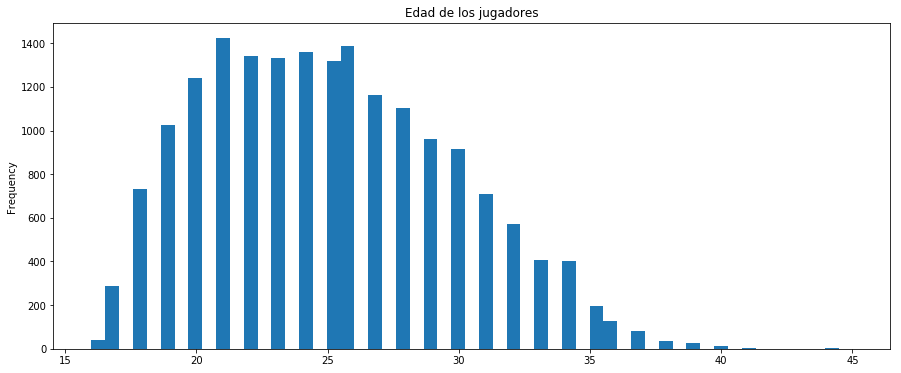

In [6]:
plt.figure(1 , figsize = (15 , 6))
df_pickle['Age'].plot(kind = 'hist' , bins = 55)
plt.title('Edad de los jugadores')
plt.show()

In [25]:
serie_pie = df_pickle['Preferred Foot'].unique()
print(serie_pie)

['Left' 'Right' nan]


In [22]:
df_pie_izquierdo = df_pickle[df_pickle['Preferred Foot'] == 'Left']
df_pie_derecho = df_pickle[df_pickle['Preferred Foot'] == 'Right']

In [23]:
df_pie_derecho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13948 entries, 20801 to 246269
Data columns (total 88 columns):
Unnamed: 0                  13948 non-null int64
Name                        13948 non-null object
Age                         13948 non-null int64
Photo                       13948 non-null object
Nationality                 13948 non-null object
Flag                        13948 non-null object
Overall                     13948 non-null int64
Potential                   13948 non-null int64
Club                        13756 non-null object
Club Logo                   13948 non-null object
Value                       13948 non-null object
Wage                        13948 non-null object
Special                     13948 non-null int64
Preferred Foot              13948 non-null object
International Reputation    13948 non-null float64
Weak Foot                   13948 non-null float64
Skill Moves                 13948 non-null float64
Work Rate                   13948 non-

In [35]:
df_stats = df_pickle.iloc[:,-19:-9]
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 10 columns):
Jumping          18159 non-null float64
Stamina          18159 non-null float64
Strength         18159 non-null float64
LongShots        18159 non-null float64
Aggression       18159 non-null float64
Interceptions    18159 non-null float64
Positioning      18159 non-null float64
Vision           18159 non-null float64
Penalties        18159 non-null float64
Composure        18159 non-null float64
dtypes: float64(10)
memory usage: 1.5 MB


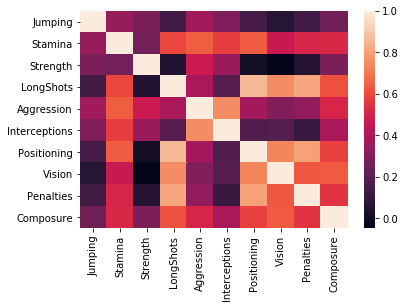

In [37]:
sns.heatmap(data=df_stats.corr())

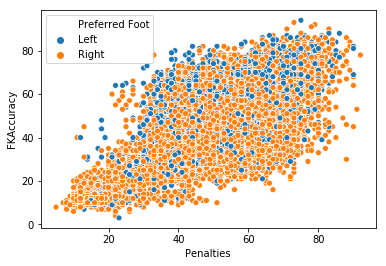

In [28]:
sns.scatterplot(x='Penalties',y='FKAccuracy',data=df_pickle,hue='Preferred Foot')

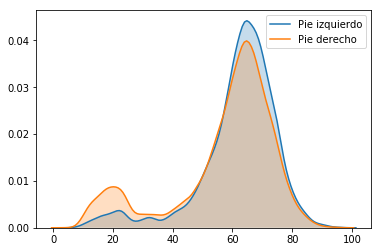

In [26]:
sns.kdeplot(data=df_pie_izquierdo['BallControl'],shade=True,label='Pie izquierdo')
sns.kdeplot(data=df_pie_derecho['BallControl'],shade=True,label='Pie derecho')

In [22]:
df_datos_importantes = df_pickle[['Name','Age','Club','Wage','Value','Nationality','Overall','Preferred Foot','Position']]

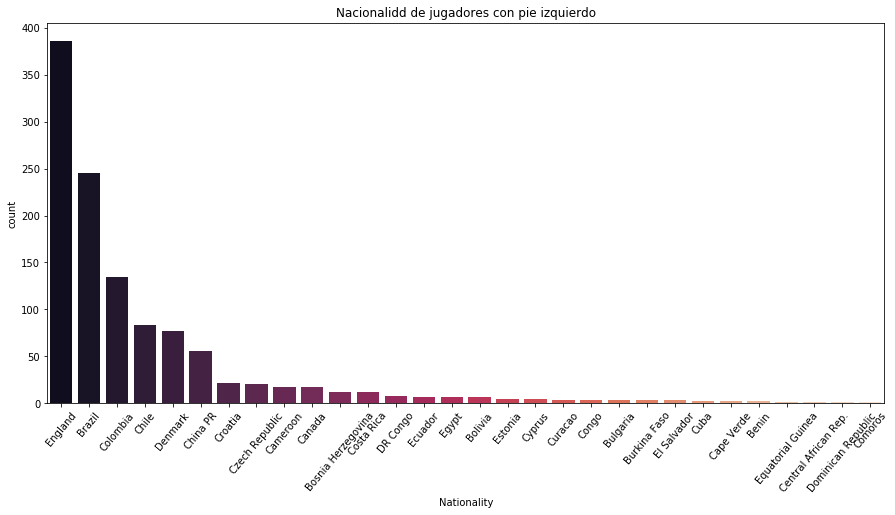

In [165]:
df_datos_importantes_pie_izquierdo = df_datos_importantes[df_datos_importantes['Preferred Foot'] == 'Left']


countries = df_datos_importantes_pie_izquierdo['Nationality'].sort_values().unique()
countries

countries_limitado = countries[10:40]


plt.figure(1 , figsize = (15 , 7))

sns.countplot(x  = 'Nationality' ,
              data = df_datos_importantes_pie_izquierdo[df_datos_importantes_pie_izquierdo['Nationality'].isin(countries_limitado)] ,
              order  = df_datos_importantes_pie_izquierdo[df_datos_importantes_pie_izquierdo['Nationality'].isin(countries_limitado)]['Nationality'].value_counts().index , 
             palette = 'rocket') 
plt.xticks(rotation = 50)
plt.title('Nacionalidd de jugadores con pie izquierdo' )
plt.show()


In [96]:
jugadores_ecuatorianos = df_datos_importantes[df_datos_importantes['Nationality'] == 'Ecuador']
jugadores_ecuatorianos

,Name,Age,Club,Value,Nationality,Overall,Preferred Foot
ID,,,,,,,
167905,A. Valencia,32,Manchester United,€10M,Ecuador,81,Right
175254,F. Caicedo,29,Lazio,€9M,Ecuador,77,Left
220295,E. Valencia,28,Tigres U.A.N.L.,€8M,Ecuador,76,Right
186805,J. Montero,28,Swansea City,€8M,Ecuador,76,Right
204738,R. Ibarra,27,Club América,€6M,Ecuador,74,Right
202184,J. Plata,26,Real Salt Lake,€6M,Ecuador,74,Right
207653,M. Bolaños,28,Club Tijuana,€4M,Ecuador,73,Right
189024,M. Banguera,32,NaN,€0,Ecuador,73,Right
199103,A. Domínguez,31,Vélez Sarsfield,€2.4M,Ecuador,73,Right


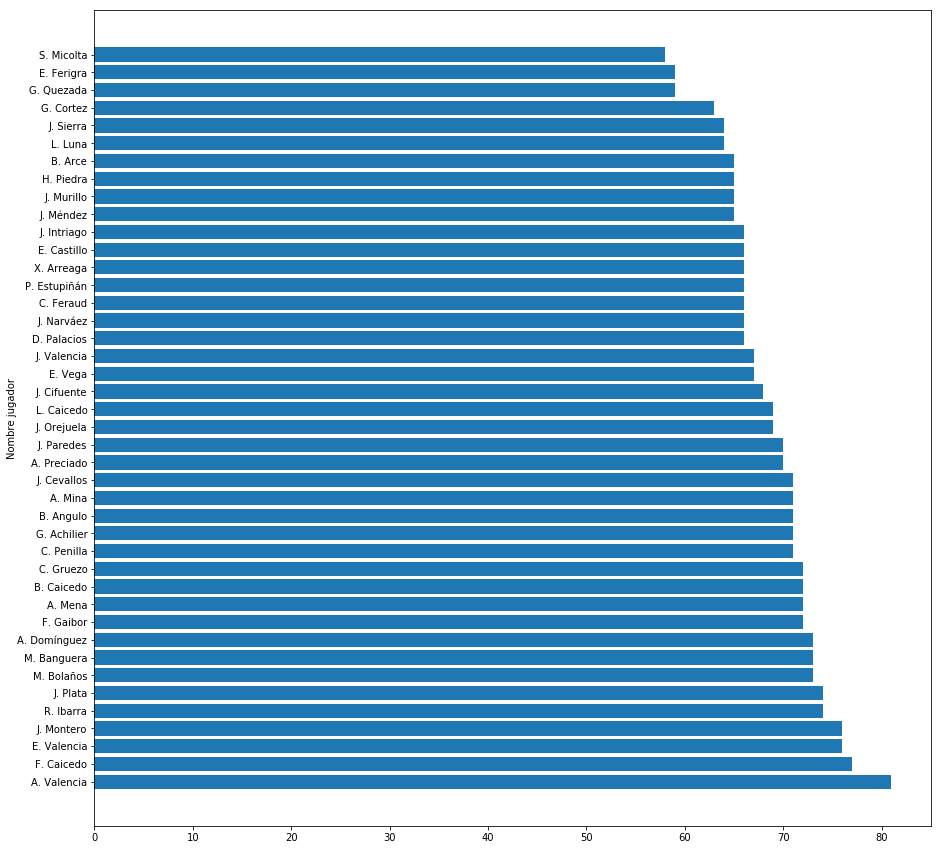

In [167]:
plt.figure(3 , figsize = (15 , 15))
plt.barh(y='Name',width='Overall',data=jugadores_ecuatorianos)
plt.ylabel(labelpad=0.2,ylabel='Nombre jugador')
plt.show()

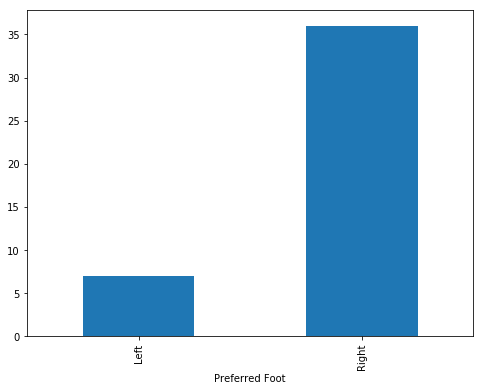

In [98]:
plt.figure(3 , figsize = (8 , 6))
jugadores_ecuatorianos.groupby(['Preferred Foot'])['Name'].count().plot(kind='bar')
plt.show()

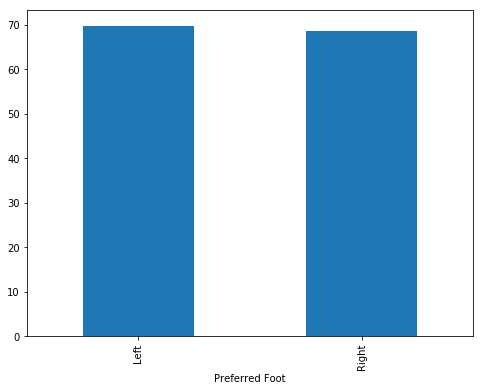

In [99]:
plt.figure(3 , figsize = (8 , 6))
jugadores_ecuatorianos.groupby(['Preferred Foot'])['Overall'].mean().plot(kind='bar')
plt.show()

# Los 10 jugadores más jóvenes en fifa 19

In [170]:
df_datos_importantes.sort_values(by = 'Age' , ascending = True)[['Name','Age','Club','Nationality'
                                               ,'Overall','Value' ]].head(10)

,Name,Age,Club,Nationality,Overall,Value
ID,,,,,,
246269,G. Nugent,16,Tranmere Rovers,England,46,€60K
244752,J. Olstad,16,Sarpsborg 08 FF,Norway,52,€100K
246594,H. Massengo,16,AS Monaco,France,62,€450K
241552,J. Italiano,16,Perth Glory,Australia,58,€280K
243621,N. Ayéva,16,Örebro SK,Sweden,48,€70K
245470,K. Broda,16,Wisła Kraków,Poland,53,€110K
242240,L. D'Arrigo,16,Adelaide United,Australia,54,€130K
246419,Y. Verschaeren,16,RSC Anderlecht,Belgium,62,€650K
243646,B. Nygren,16,IFK Göteborg,Sweden,56,€180K


# Los 10 jugadores más viejos en el fifa 19

In [171]:
df_pickle.sort_values(by = 'Age' , ascending = False)[['Name','Club','Nationality'
                                               ,'Overall', 'Age','Value' ]].head(10)

,Name,Club,Nationality,Overall,Age,Value
ID,,,,,,
140029,O. Pérez,Pachuca,Mexico,71,45,€160K
53748,K. Pilkington,Cambridge United,England,48,44,€0
51963,T. Warner,Accrington Stanley,Trinidad & Tobago,53,44,€0
140183,S. Narazaki,Nagoya Grampus,Japan,65,42,€40K
142998,C. Muñoz,CD Universidad de Concepción,Argentina,68,41,€60K
156092,J. Villar,NaN,Paraguay,77,41,€0
208927,H. Sulaimani,Ohod Club,Saudi Arabia,63,41,€0
18745,M. Tyler,Peterborough United,England,59,41,€10K
3665,B. Nivet,ESTAC Troyes,France,71,41,€0


In [15]:
def transformarPrecio(precio):
    if '€' in str(precio) and 'M' in str(precio):
        c = str(precio).replace('€','')
        c = str(c).replace('M','')
        c = float(c)*1000000
    else:
        c = str(precio).replace('€','')
        c = str(c).replace('K','')
        c = float(c)*1000
    return c
limpiar = lambda precio: transformarPrecio(precio)
df_datos_importantes_copy = df_datos_importantes.copy()
df_datos_importantes_copy['Value_num'] = df_datos_importantes_copy['Value'].apply(limpiar)
df_datos_importantes_copy['Wage_num'] = df_datos_importantes_copy['Wage'].apply(limpiar)

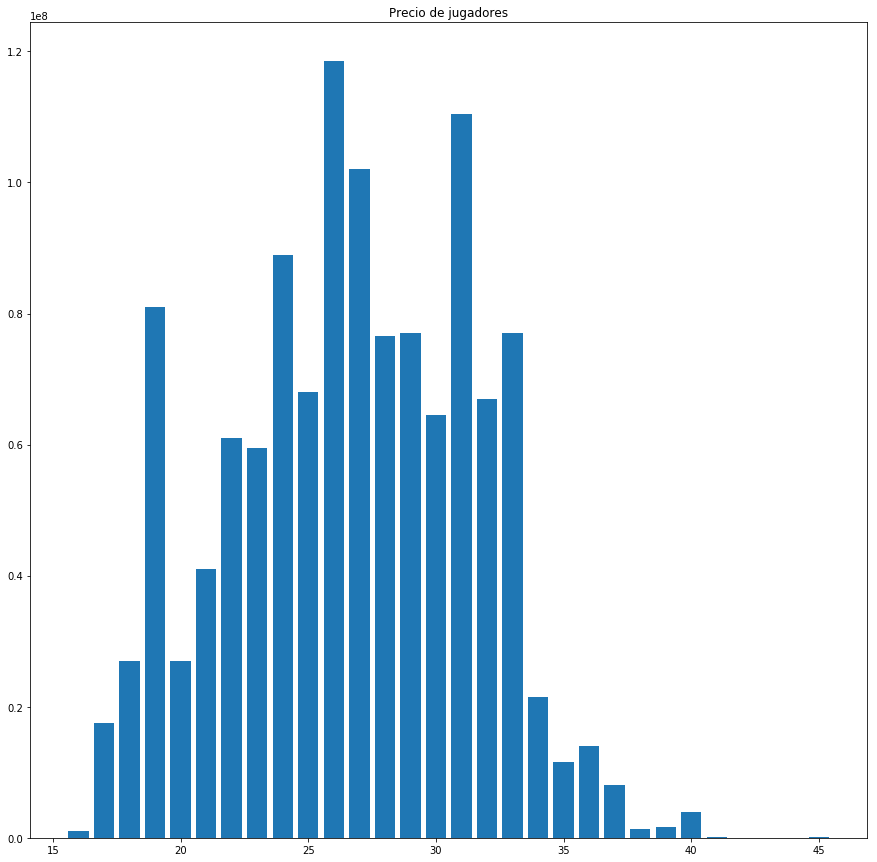

In [17]:
plt.figure(3 , figsize = (15 , 15))
plt.bar(x='Age',height='Value_num',data=df_datos_importantes_copy)
plt.title('Precio de jugadores' )
plt.show()

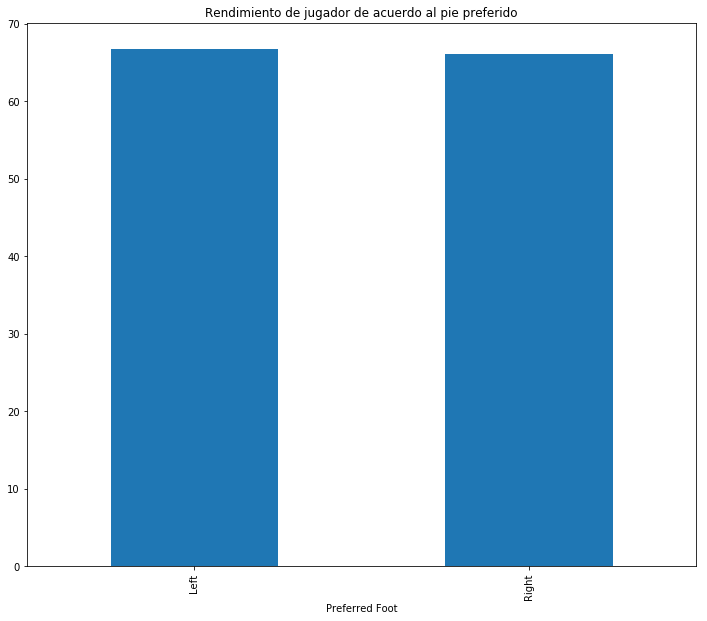

In [40]:
plt.figure(4 , figsize = (12 , 10))
df_pickle.groupby(['Preferred Foot'])['Overall'].mean().plot(kind='bar')
plt.title('Rendimiento de jugador de acuerdo al pie preferido' )
plt.show()

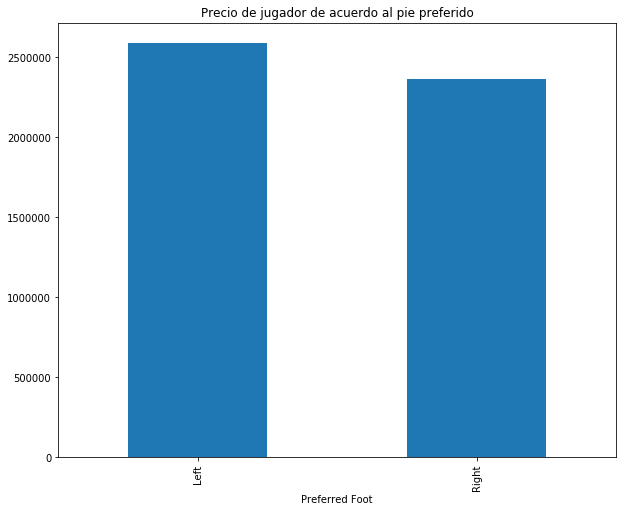

In [41]:
plt.figure(4 , figsize = (10 , 8))
df_datos_importantes_copy.groupby(['Preferred Foot'])['Value_num'].mean().plot(kind='bar')
plt.title('Precio de jugador de acuerdo al pie preferido' )
plt.show()


In [21]:
df_datos_importantes_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 8 columns):
Name              18207 non-null object
Age               18207 non-null int64
Club              17966 non-null object
Value             18207 non-null object
Nationality       18207 non-null object
Overall           18207 non-null int64
Preferred Foot    18159 non-null object
Value_num         18207 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.3+ MB


<Figure size 720x576 with 0 Axes>

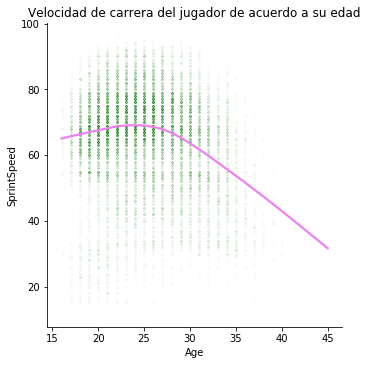

In [46]:
plt.figure(5 , figsize = (10 , 8))
sns.lmplot(data = df_pickle, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'violet'})
plt.title('Velocidad de carrera del jugador de acuerdo a su edad' )
plt.show()

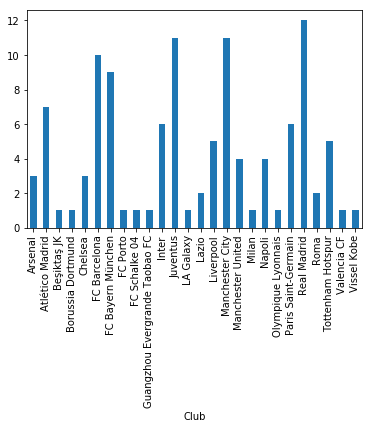

In [6]:
talents_df = df_pickle.filter(["Name", "Club", "Overall"])
talents_df = talents_df[talents_df.Overall >= 85]

talents_df.groupby(['Club'])['Overall'].count().plot(kind='bar')

In [7]:
talents_df = talents_df.groupby("Club").count()
talents_df = talents_df.sort_values(by=['Name'],ascending=False)
top_ten_clubs = talents_df[:10]
top_ten_clubs = list(top_ten_clubs.index.values)
top_ten_clubs

['Real Madrid',
 'Manchester City',
 'Juventus',
 'FC Barcelona',
 'FC Bayern München',
 'Atlético Madrid',
 'Paris Saint-Germain',
 'Inter',
 'Tottenham Hotspur',
 'Liverpool']

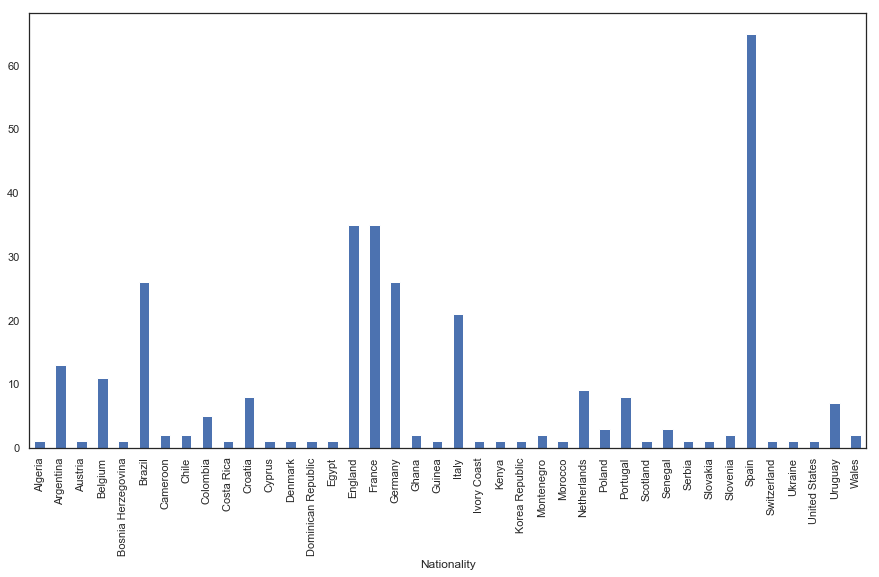

In [19]:
top_ten_clubs_data = df_datos_importantes_copy.loc[df_datos_importantes_copy['Club'].isin(top_ten_clubs), :]
top_ten_clubs_data
plt.figure(5 , figsize = (15 , 8))
top_ten_clubs_data.groupby(['Nationality'])['Club'].count().plot(kind='bar')

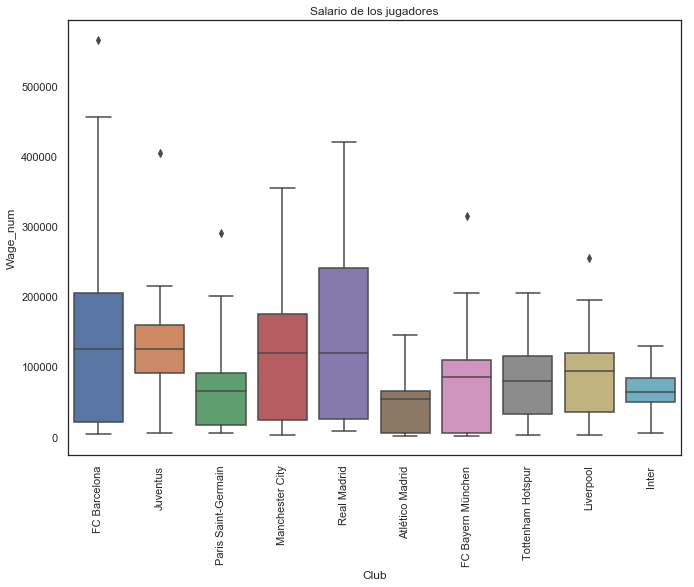

In [21]:
sns.set(style="white")
plt.figure(figsize=(11,8))
p = sns.boxplot(x = 'Club', y = 'Wage_num', data = top_ten_clubs_data)
p = plt.xticks(rotation=90)
p = plt.title('Salario de los jugadores')

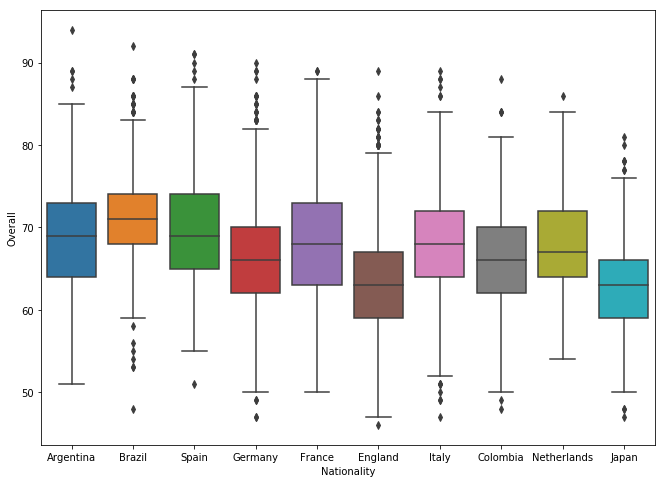

In [5]:
top_ten_countries = df_pickle['Nationality'].value_counts().head(10).index.values
top_ten_countries_data = df_pickle.loc[df_pickle['Nationality'].isin(top_ten_countries), :]

plt.figure(figsize=(11, 8))
p = sns.boxplot(x = 'Nationality', y = 'Overall', data = top_ten_countries_data)